In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('kc_house_data.csv')

In [3]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [4]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [5]:
df.shape

(21613, 21)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [7]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [8]:
df.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,20141015T000000,325000.0,2,0.75,1020,1076,2.0,0,0,...,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [9]:
df.nunique()

id               21436
date               372
price             4028
bedrooms            13
bathrooms           30
sqft_living       1038
sqft_lot          9782
floors               6
waterfront           2
view                 5
condition            5
grade               12
sqft_above         946
sqft_basement      306
yr_built           116
yr_renovated        70
zipcode             70
lat               5034
long               752
sqft_living15      777
sqft_lot15        8689
dtype: int64

In [10]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [11]:
for i in df:
    print(i, ':', df[i].unique(),'\n')

id : [7129300520 6414100192 5631500400 ... 1523300141  291310100 1523300157] 

date : ['20141013T000000' '20141209T000000' '20150225T000000' '20150218T000000'
 '20140512T000000' '20140627T000000' '20150115T000000' '20150415T000000'
 '20150312T000000' '20150403T000000' '20140527T000000' '20140528T000000'
 '20141007T000000' '20150124T000000' '20140731T000000' '20140529T000000'
 '20141205T000000' '20150424T000000' '20140514T000000' '20140826T000000'
 '20140703T000000' '20140516T000000' '20141120T000000' '20141103T000000'
 '20140626T000000' '20141201T000000' '20140624T000000' '20150302T000000'
 '20141110T000000' '20141203T000000' '20140613T000000' '20141230T000000'
 '20150213T000000' '20140620T000000' '20140715T000000' '20140811T000000'
 '20140707T000000' '20141028T000000' '20140729T000000' '20140718T000000'
 '20150325T000000' '20140716T000000' '20150428T000000' '20150311T000000'
 '20140916T000000' '20150217T000000' '20141231T000000' '20150205T000000'
 '20150303T000000' '20140819T000000' '

In [12]:
df['waterfront'].value_counts()

waterfront
0    21450
1      163
Name: count, dtype: int64

In [13]:
df['waterfront'].shape

(21613,)

In [14]:
df['bedrooms'].value_counts()

bedrooms
3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
0       13
8       13
9        6
10       3
11       1
33       1
Name: count, dtype: int64

In [15]:
# maximum price of house
print('Maximum price of house is:', df['price'].max())

Maximum price of house is: 7700000.0


In [16]:
# Minimum price of house
print('Minimum price of house is:', df['price'].min())

Minimum price of house is: 75000.0


In [17]:
# Index number of the row on which the price of the house is maximum 
# idxmax will return the max price value row indexnumber 

df['price'].idxmax()

7252

In [18]:
df['price'].idxmin()

1149

In [19]:
# Total valuation of all house price in the data

print('Total valuation of all the house:', df['price'].sum())

Total valuation of all the house: 11672925008.0


In [20]:
bed3 = df[df['bedrooms'] == 3]

In [21]:
print('The total valuation of 3 bedroom house is:', bed3['price'].sum())

The total valuation of 3 bedroom house is: 4580263939.0


In [22]:
df.groupby('bedrooms')['price'].sum()

bedrooms
0     5.323550e+06
1     6.321093e+07
2     1.107789e+09
3     4.580264e+09
4     4.372957e+09
5     1.259346e+09
6     2.245416e+08
7     3.614502e+07
8     1.436600e+07
9     5.363999e+06
10    2.458000e+06
11    5.200000e+05
33    6.400000e+05
Name: price, dtype: float64

In [23]:
# filter the data of all house having sqft_living > 5000 
df[(df['sqft_living'] > 5000)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
153,7855801670,20150401T000000,2250000.0,4,3.25,5180,19850,2.0,0,3,...,12,3540,1640,2006,0,98006,47.5620,-122.162,3160,9750
269,7960900060,20150504T000000,2900000.0,4,3.25,5050,20100,1.5,0,2,...,11,4750,300,1982,2008,98004,47.6312,-122.223,3890,20060
270,4054500390,20141007T000000,1365000.0,4,4.75,5310,57346,2.0,0,0,...,11,5310,0,1989,0,98077,47.7285,-122.042,4180,47443
419,8678500060,20140710T000000,1550000.0,5,4.25,6070,171626,2.0,0,0,...,12,6070,0,1999,0,98024,47.5954,-121.950,4680,211267
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21344,8835770170,20140822T000000,1488000.0,5,6.00,6880,279968,2.0,0,3,...,12,4070,2810,2007,0,98045,47.4624,-121.779,4690,256803
21467,2311400056,20141201T000000,1987500.0,5,3.50,5230,8960,2.0,0,0,...,11,4450,780,2014,0,98004,47.5964,-122.201,2310,9603
21506,2524069097,20140509T000000,2238890.0,5,6.50,7270,130017,2.0,0,0,...,12,6420,850,2010,0,98027,47.5371,-121.982,1800,44890
21521,7430500110,20141209T000000,1378000.0,5,3.50,5150,12230,2.0,0,2,...,10,3700,1450,2007,0,98008,47.6249,-122.090,2940,13462


In [24]:
df = df.drop_duplicates()

In [25]:
df.shape

(21613, 21)

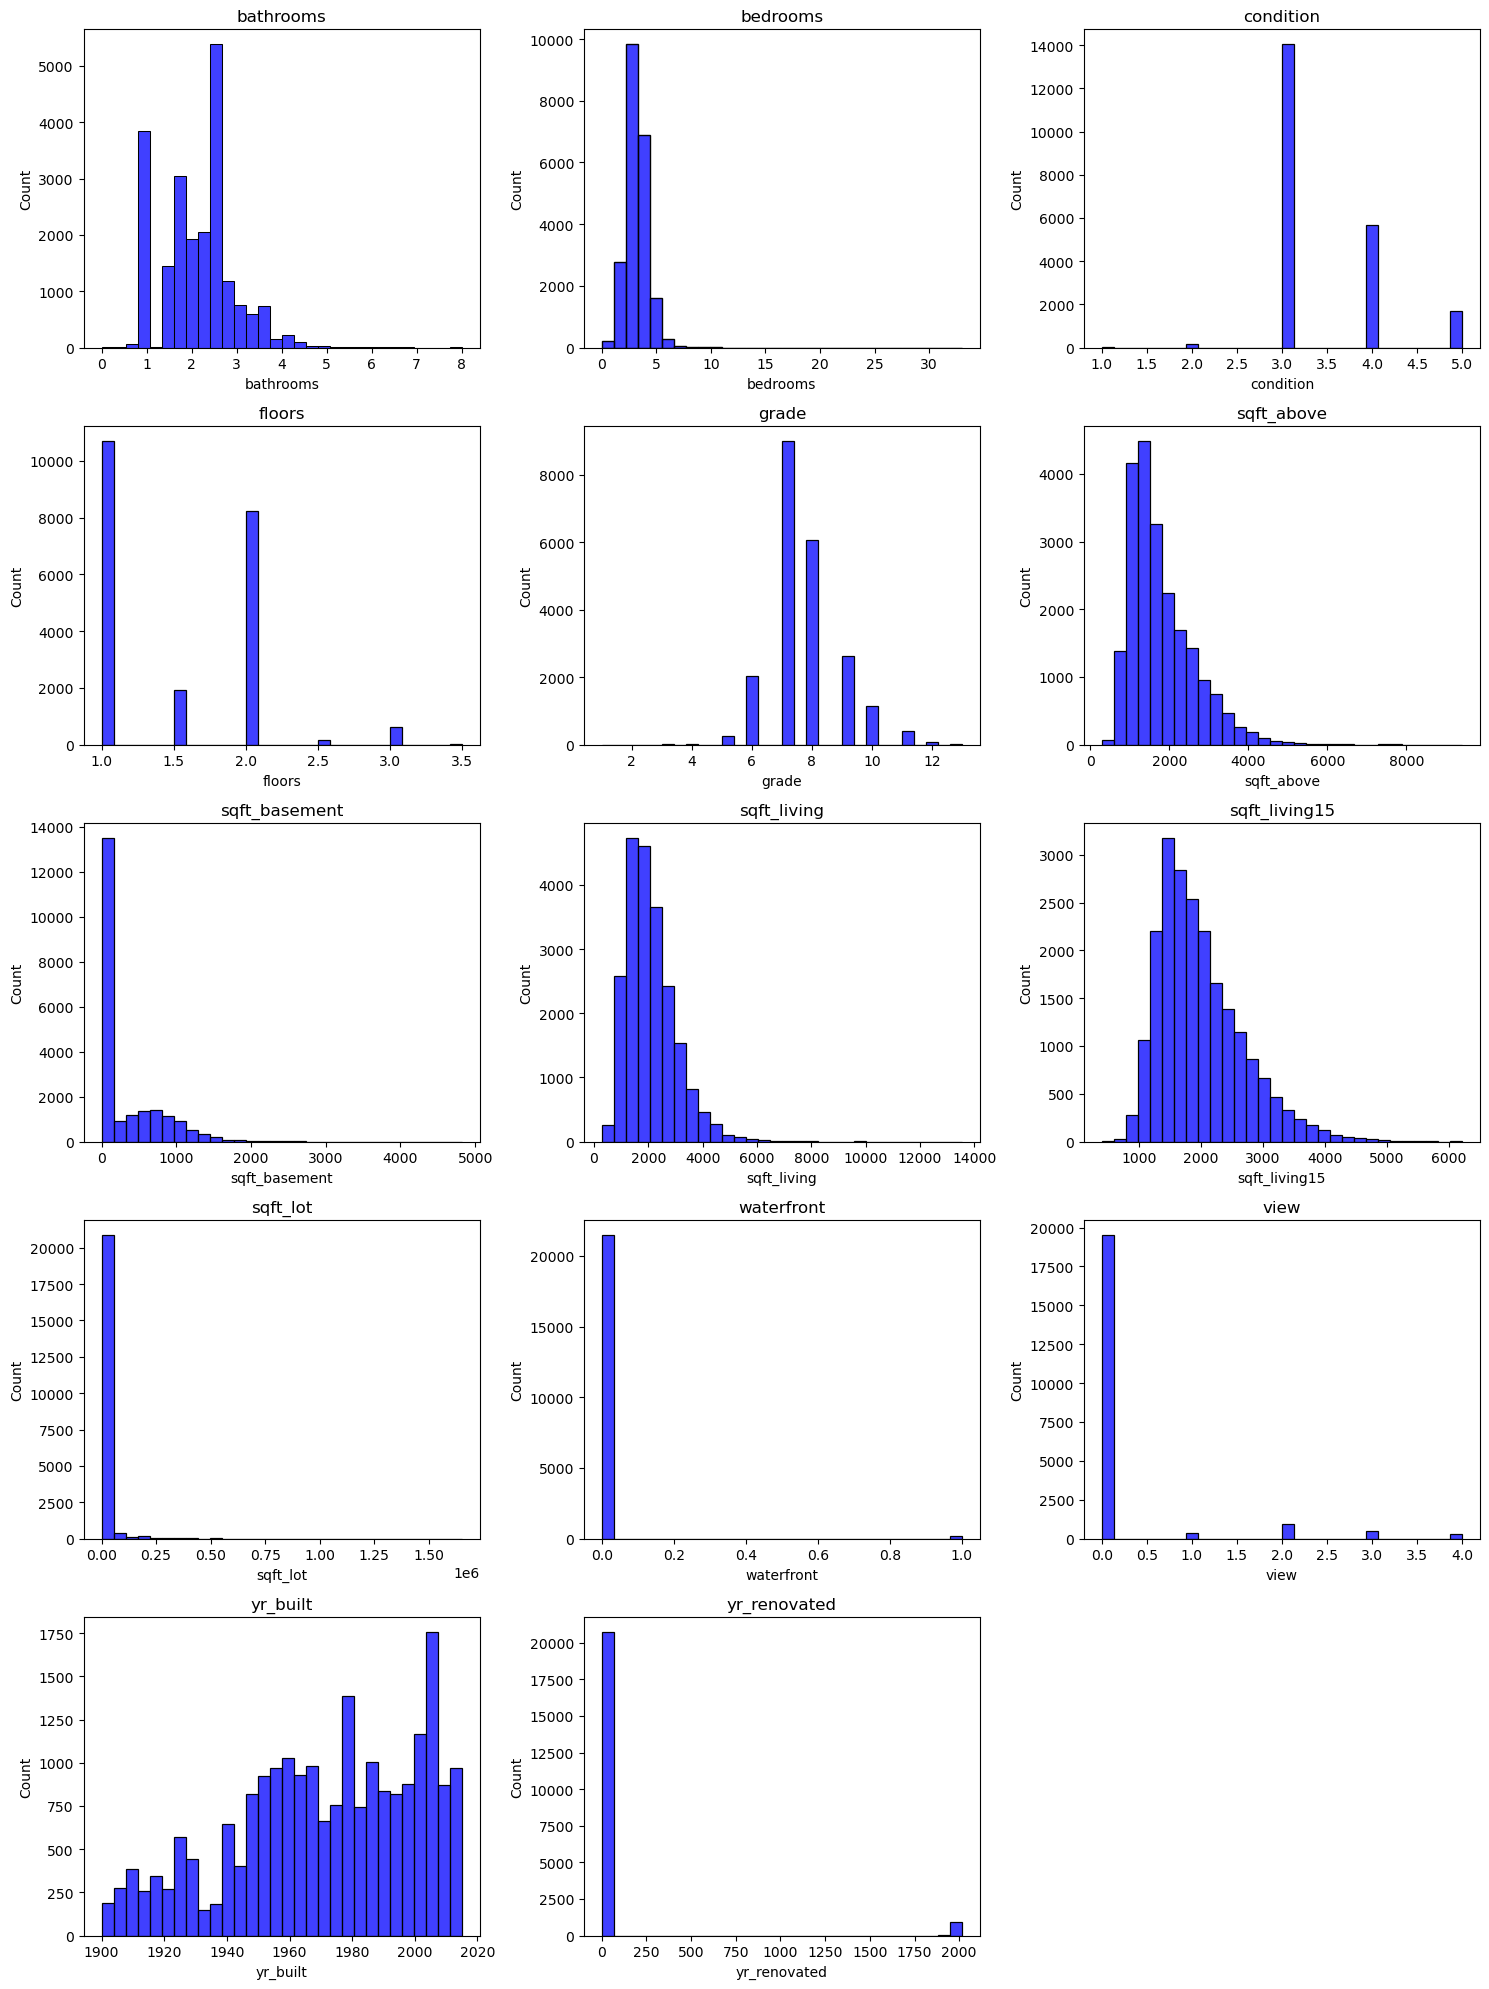

In [26]:
fig = plt.figure(figsize=(15, 20))
    
# List of numerical columns to plot
columns = ['bathrooms', 'bedrooms', 'condition', 'floors',
              'grade', 'sqft_above', 'sqft_basement', 'sqft_living',
              'sqft_living15', 'sqft_lot', 'waterfront', 'view',
              'yr_built', 'yr_renovated']
    
# Create 5x3 subplots
for i, col in enumerate(columns, 1):
    plt.subplot(5, 3, i)
    sns.histplot(data=df, x=col, bins=30, color='blue')
    plt.title(col)
    
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.tight_layout()

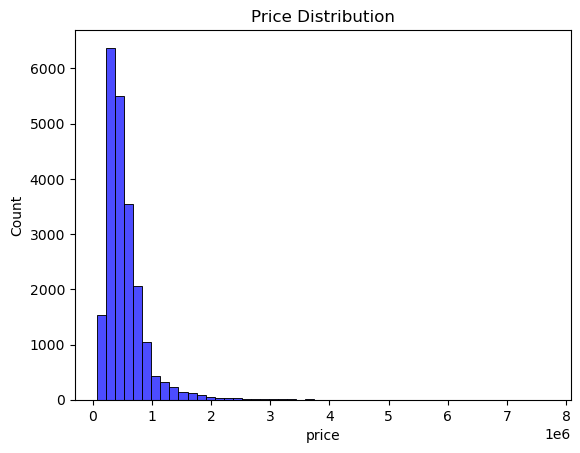

In [27]:
sns.histplot(data=df, x='price', bins=50, color='blue', alpha=0.7)
plt.title('Price Distribution')
plt.show()

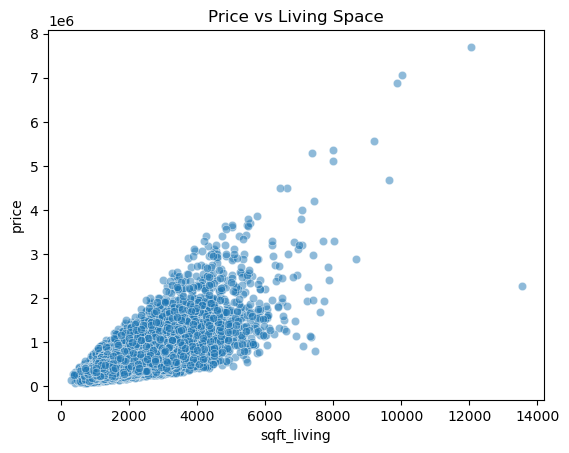

In [28]:
sns.scatterplot(data=df, x='sqft_living', y='price', alpha=0.5)
plt.title('Price vs Living Space')
plt.show()

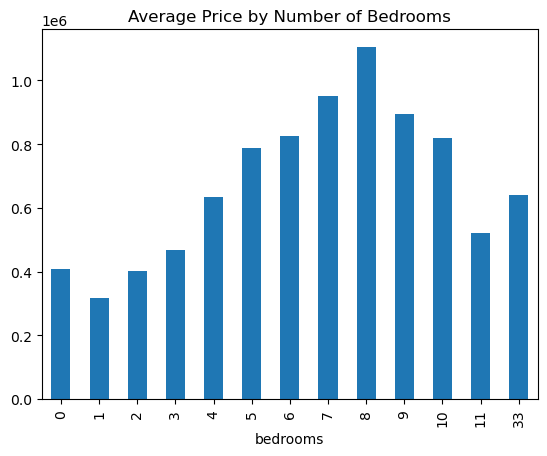

In [29]:
df.groupby('bedrooms')['price'].mean().plot(kind='bar')
plt.title('Average Price by Number of Bedrooms')
plt.show()

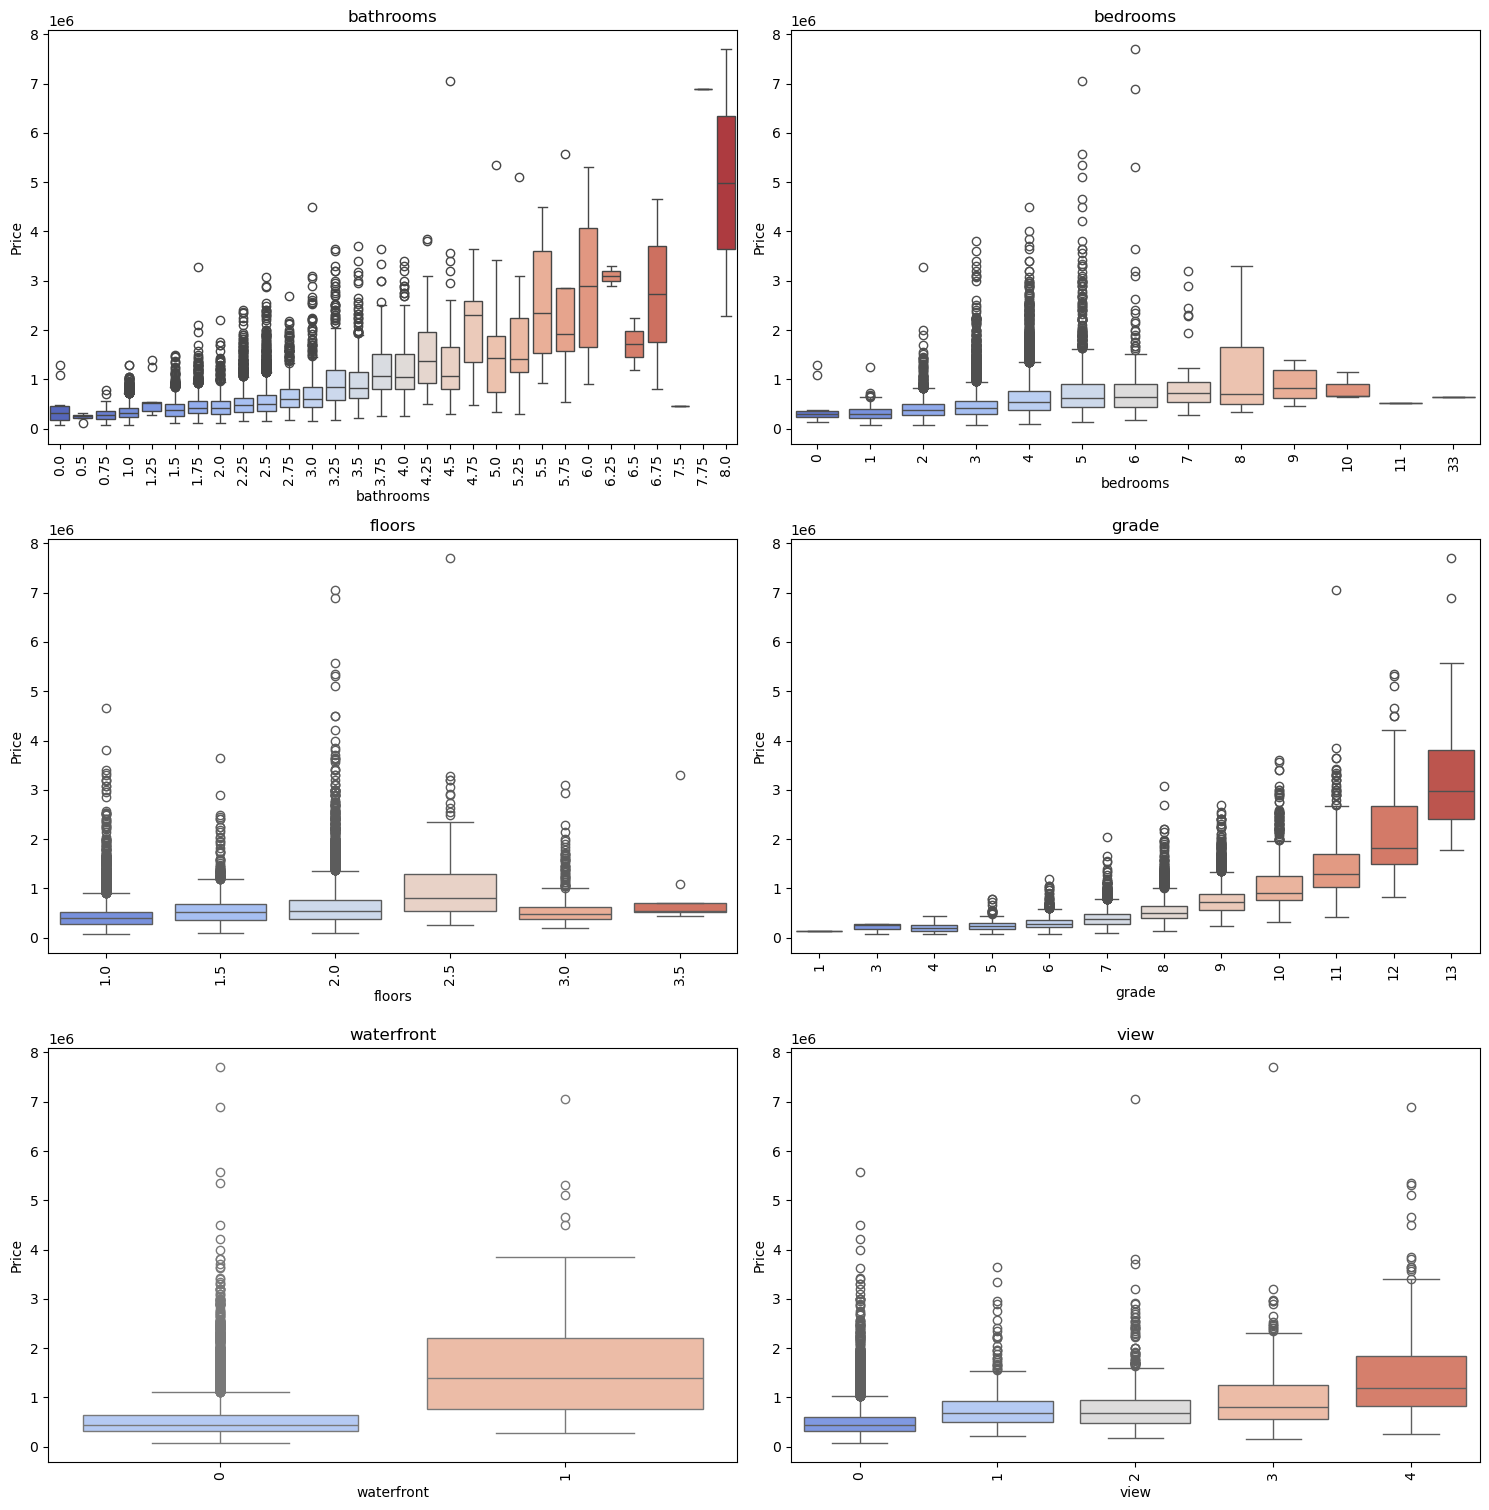

In [30]:
fig = plt.figure(figsize=(15, 25))
    
# List of numerical columns to plot
columns = ['bathrooms', 'bedrooms', 'floors',
              'grade', 'waterfront', 'view'
              ]
    
# Create 5x2 subplots
for i, col in enumerate(columns, 1):
    plt.subplot(5, 2, i)
    ax = sns.boxplot(data=df, x=col, y = df['price'], palette='coolwarm')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Price')
    plt.tight_layout()
    

In [31]:
df['year'] = df['date'].str[:4]

In [32]:
df['month'] = df['date'].str[4:6]

In [33]:
df = df.drop(['date', 'id'], axis = 1)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   waterfront     21613 non-null  int64  
 7   view           21613 non-null  int64  
 8   condition      21613 non-null  int64  
 9   grade          21613 non-null  int64  
 10  sqft_above     21613 non-null  int64  
 11  sqft_basement  21613 non-null  int64  
 12  yr_built       21613 non-null  int64  
 13  yr_renovated   21613 non-null  int64  
 14  zipcode        21613 non-null  int64  
 15  lat            21613 non-null  float64
 16  long           21613 non-null  float64
 17  sqft_living15  21613 non-null  int64  
 18  sqft_l

In [35]:
df['year'] = df['year'].astype('int64') 

In [36]:
df['month'] = df['month'].astype('int64')

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   waterfront     21613 non-null  int64  
 7   view           21613 non-null  int64  
 8   condition      21613 non-null  int64  
 9   grade          21613 non-null  int64  
 10  sqft_above     21613 non-null  int64  
 11  sqft_basement  21613 non-null  int64  
 12  yr_built       21613 non-null  int64  
 13  yr_renovated   21613 non-null  int64  
 14  zipcode        21613 non-null  int64  
 15  lat            21613 non-null  float64
 16  long           21613 non-null  float64
 17  sqft_living15  21613 non-null  int64  
 18  sqft_l

In [38]:
x = df.drop('price', axis = 1)
y = df['price']

In [39]:
x

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,2014,5
21609,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,2015,2
21610,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,2014,6
21611,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,2015,1


In [40]:
y

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21608    360000.0
21609    400000.0
21610    402101.0
21611    400000.0
21612    325000.0
Name: price, Length: 21613, dtype: float64

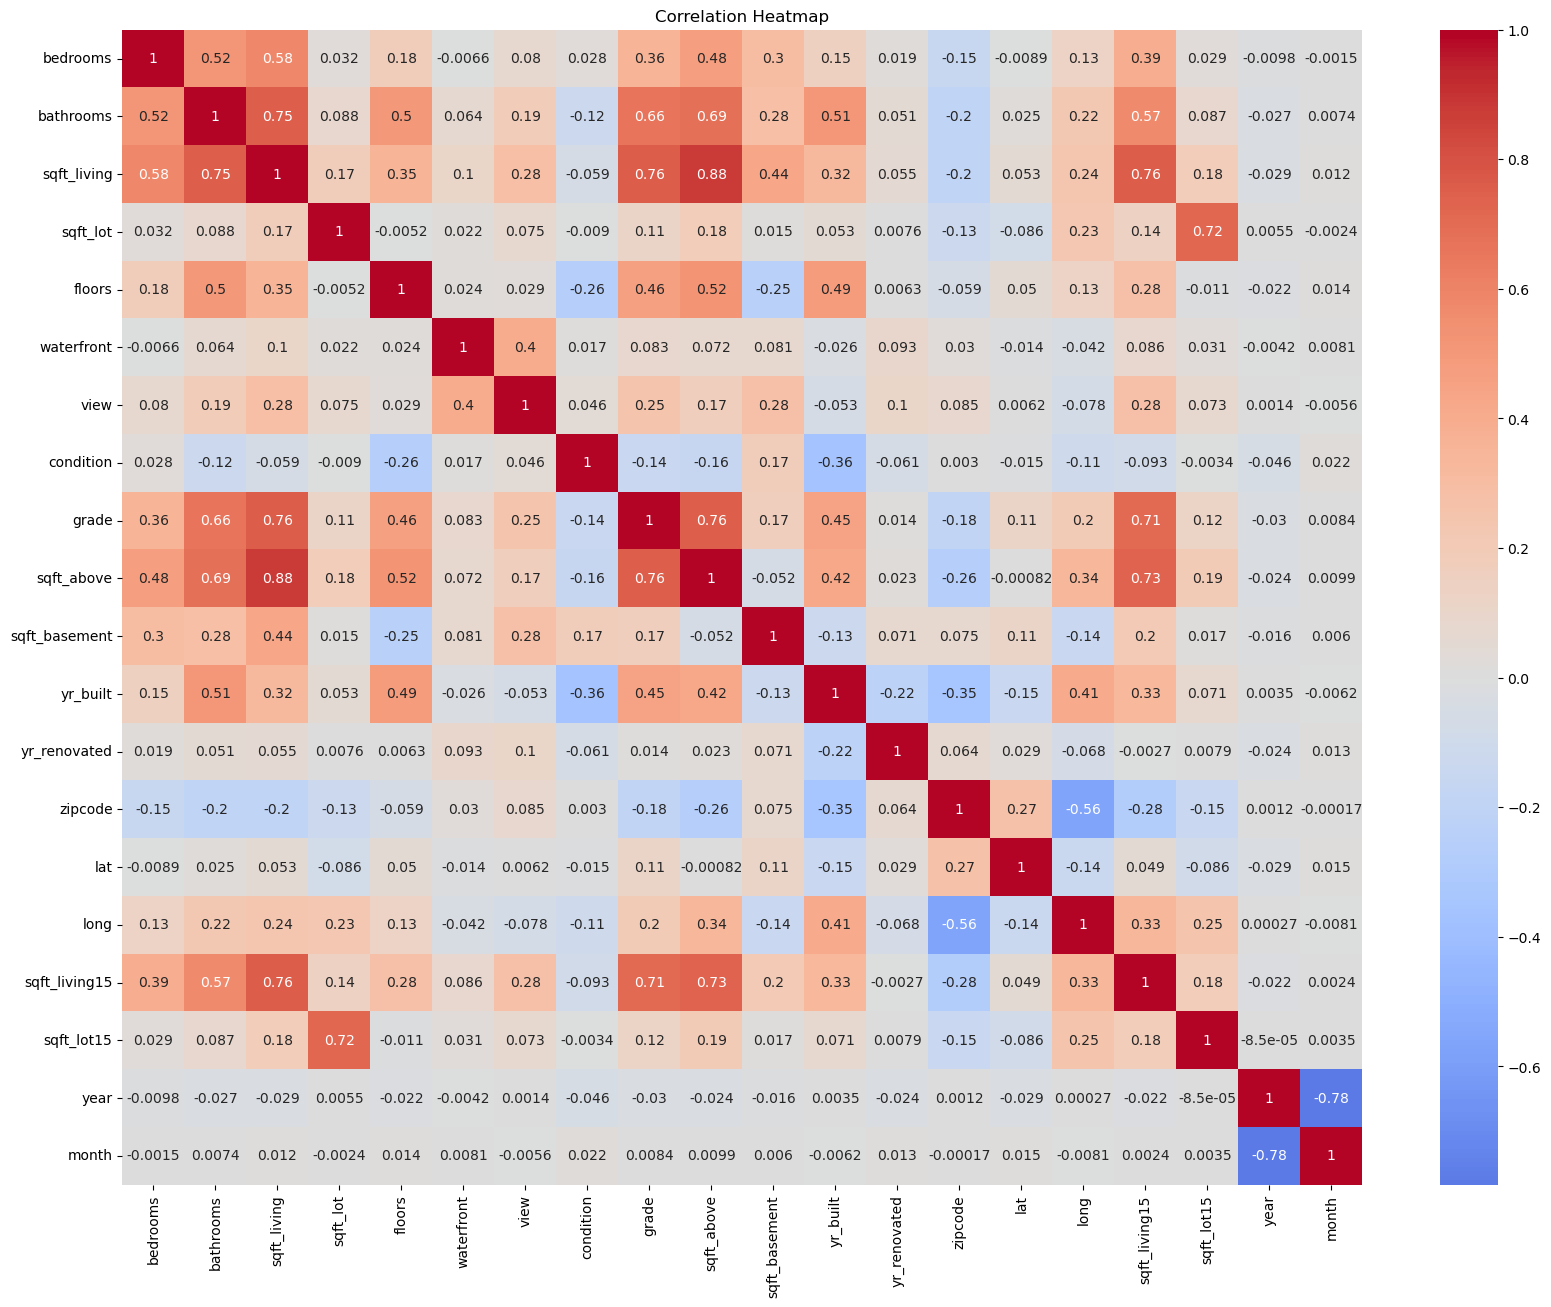

In [41]:
plt.figure(figsize = (20, 15))
sns.heatmap(x.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

# Multiple Linear Regression:

In [43]:
# Algorithms
from sklearn.linear_model import LinearRegression  # Importing Linear regression algorithm
from sklearn.model_selection import train_test_split   # Importing train test split algorithm
from sklearn.metrics import mean_squared_error, r2_score,  mean_absolute_error  # Evaluation metrics of linear regression

In [44]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)

In [45]:
x_train

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
2060,3,2.00,1540,6250,1.0,0,0,3,7,1540,0,1998,0,98038,47.3539,-122.025,2070,6250,2014,7
11759,2,1.00,810,7158,1.0,0,0,5,6,810,0,1944,0,98168,47.4882,-122.325,1090,7158,2014,5
8274,3,1.00,860,10426,1.0,0,0,3,6,860,0,1954,0,98146,47.4987,-122.341,1140,11250,2014,11
21272,4,2.50,1750,4779,2.0,0,0,3,7,1750,0,2009,0,98028,47.7608,-122.232,1580,4687,2014,6
14328,3,1.00,1410,9656,1.0,0,0,3,7,960,450,1953,0,98004,47.6354,-122.208,2410,9384,2015,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10955,3,2.50,1920,3867,2.0,0,0,3,8,1920,0,2005,0,98029,47.5538,-121.994,2190,3841,2014,8
17289,4,4.50,3420,7440,3.0,0,0,3,9,3420,0,2014,0,98103,47.6875,-122.330,1360,5580,2015,1
5192,3,1.75,1970,54450,1.0,0,0,3,8,1570,400,1980,0,98075,47.5936,-122.012,2460,36677,2015,4
12172,3,2.25,1980,8775,1.0,0,0,3,7,1290,690,1959,0,98177,47.7753,-122.359,1550,9240,2014,8


In [46]:
x_test

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
15544,4,2.75,2790,6600,2.0,0,0,3,9,2790,0,2000,0,98058,47.4362,-122.109,2900,6752,2014,10
17454,3,2.25,1630,6449,1.0,0,0,3,7,1310,320,1986,0,98011,47.7275,-122.232,1620,7429,2015,4
21548,2,1.50,2370,184231,2.0,0,0,3,11,2370,0,2005,0,98045,47.4543,-121.778,3860,151081,2014,8
3427,4,2.50,2270,7665,2.0,0,0,3,9,2270,0,1986,0,98052,47.6612,-122.148,2450,8706,2014,11
8809,3,1.00,1430,7599,1.5,0,0,4,6,1010,420,1930,0,98168,47.4783,-122.265,1290,10320,2015,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14866,4,2.50,3002,6042,2.0,0,0,3,8,3002,0,2004,0,98055,47.4231,-122.186,2566,6390,2014,7
4903,3,1.50,1240,9500,1.0,0,0,4,7,1240,0,1955,0,98166,47.4756,-122.350,1845,10125,2014,11
16080,2,1.00,1280,4635,1.0,0,0,3,6,840,440,1917,0,98118,47.5532,-122.280,1660,6180,2015,4
15668,5,3.50,5170,7197,3.0,1,4,3,11,3520,1650,1998,0,98155,47.7561,-122.271,3020,12880,2014,10


In [47]:
y_train

2060      272500.0
11759     206000.0
8274       82000.0
21272     415500.0
14328     920000.0
           ...    
10955     571000.0
17289    1350000.0
5192      650000.0
12172     437000.0
235      1025000.0
Name: price, Length: 15129, dtype: float64

In [48]:
y_test

15544     459000.0
17454     445000.0
21548    1057000.0
3427      732350.0
8809      235000.0
           ...    
14866     394500.0
4903      259950.0
16080     230000.0
15668    1680000.0
18802     293000.0
Name: price, Length: 6484, dtype: float64

In [49]:
lr = LinearRegression()

In [50]:
lr.fit(x_train, y_train)

LinearRegression()

In [51]:
lr.intercept_

-65066193.829007484

In [52]:
lr.coef_

array([-3.24205987e+04,  3.77613379e+04,  1.06456643e+02,  8.98908106e-02,
        1.02687684e+04,  5.64622874e+05,  5.12892097e+04,  2.80244513e+04,
        9.57709575e+04,  6.94093436e+01,  3.70472998e+01, -2.54295023e+03,
        2.27447335e+01, -5.51527339e+02,  6.17166610e+05, -2.04682774e+05,
        1.95397024e+01, -3.09107456e-01,  3.43083116e+04,  1.26710963e+03])

In [53]:
y_pred = lr.predict(x_train)

In [54]:
lr.score(x_train, y_train)

0.7053007287712656

In [55]:
y_pred

array([ 142735.38010787,  157319.30510217,   81710.91446872, ...,
        495439.10391422,  548586.96044384, 1115076.00139773])

In [56]:
y_predtest = lr.predict(x_test)

In [57]:
y_predtest

array([ 632044.24134204,  497364.78700443,  692815.90809058, ...,
        341083.58992831, 2147380.89419735,  713879.92785004])

In [58]:
mse = mean_squared_error(y_test, y_predtest)
r2_score = r2_score(y_test, y_predtest)
print('MSE of all:', mse)
print('r2_score:', r2_score)

MSE of all: 48028752513.52745
r2_score: 0.6922621007628471


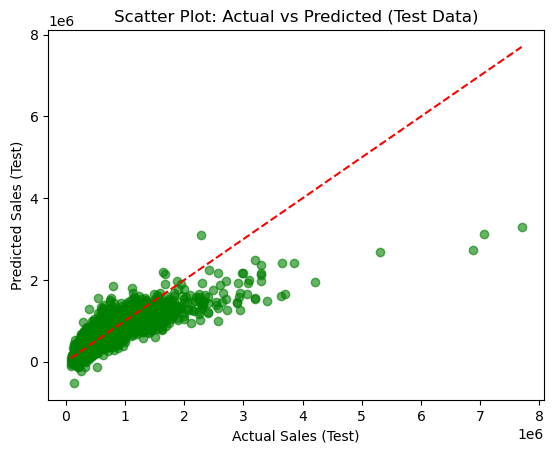

In [59]:
plt.figure()
plt.scatter(y_test, y_predtest, color='green', alpha=0.6, label='Test Data')
plt.title('Scatter Plot: Actual vs Predicted (Test Data)')
plt.xlabel('Actual Sales (Test)')
plt.ylabel('Predicted Sales (Test)')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # Identity line
plt.show()


# Polynomial Regression 

In [61]:
from sklearn.preprocessing import PolynomialFeatures

In [62]:
x1 = df.drop('price', axis = 1)
y1 = df['price']

In [63]:
x1

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,2014,5
21609,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,2015,2
21610,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,2014,6
21611,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,2015,1


In [64]:
y1

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21608    360000.0
21609    400000.0
21610    402101.0
21611    400000.0
21612    325000.0
Name: price, Length: 21613, dtype: float64

In [65]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size = 0.3, random_state = 1)

In [66]:
pf = PolynomialFeatures(2)  # As we are using only 2 features we will check by using 2 degree polynomial

In [67]:
x1_trainpoly = pf.fit_transform(x1_train)

In [68]:
x1_trainpoly

array([[1.000000e+00, 3.000000e+00, 2.000000e+00, ..., 4.056196e+06,
        1.409800e+04, 4.900000e+01],
       [1.000000e+00, 2.000000e+00, 1.000000e+00, ..., 4.056196e+06,
        1.007000e+04, 2.500000e+01],
       [1.000000e+00, 3.000000e+00, 1.000000e+00, ..., 4.056196e+06,
        2.215400e+04, 1.210000e+02],
       ...,
       [1.000000e+00, 3.000000e+00, 1.750000e+00, ..., 4.060225e+06,
        8.060000e+03, 1.600000e+01],
       [1.000000e+00, 3.000000e+00, 2.250000e+00, ..., 4.056196e+06,
        1.611200e+04, 6.400000e+01],
       [1.000000e+00, 5.000000e+00, 4.000000e+00, ..., 4.056196e+06,
        1.208400e+04, 3.600000e+01]])

In [69]:
x1_testpoly = pf.fit_transform(x1_test)

In [70]:
lr = LinearRegression()

In [71]:
lr.fit(x1_trainpoly, y1_train)

LinearRegression()

In [72]:
y1_pred = lr.predict(x1_trainpoly)

In [73]:
lr.score(x1_trainpoly, y1_train)

0.826089718301443

In [74]:
y1_predtest = lr.predict(x1_testpoly)

In [75]:
y1_predtest

array([ 545858.7868309 ,  515108.5590477 ,  549876.51436996, ...,
        402546.00985336, 2746827.60421371,  388393.49923325])

In [76]:
import sklearn.metrics as metrics

In [77]:
mse1 = mean_squared_error(y1_test, y1_predtest)
r2_score1 = metrics.r2_score(y1_test, y1_predtest)

print('MSE:',mse1) 
print('r2_score:',r2_score1)

MSE: 25650118906.433586
r2_score: 0.8356502450230033


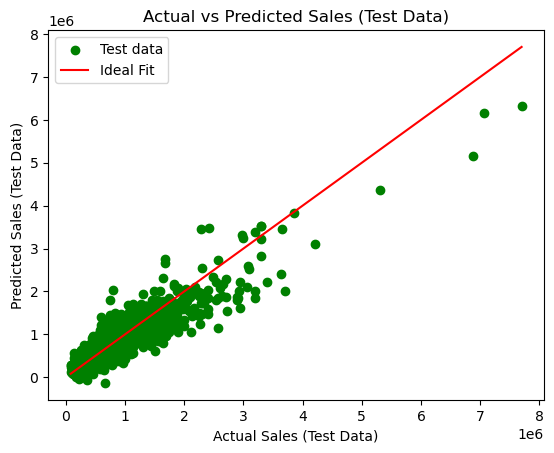

In [78]:
plt.scatter(y1_test, y1_predtest, color='green', label='Test data')
plt.plot([min(y1_test), max(y1_test)], [min(y1_test), max(y1_test)], color='red', label='Ideal Fit')
plt.xlabel('Actual Sales (Test Data)')
plt.ylabel('Predicted Sales (Test Data)')
plt.title('Actual vs Predicted Sales (Test Data)')
plt.legend()
plt.show()

In [158]:
!jupyter nbconvert --to pdf --output House_Price_Prediction.ipynb


This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execute
    Execute the notebook prior to export.
    Equivalent to: [--ExecutePr